### Задание 1. Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск. Статистически значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите менеджеру?

In [12]:
import pandas as pd

df = pd.read_csv('ab_stats.csv')
df

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
...,...,...,...,...,...
23647,0.0,0,0,B,10.207152
23648,0.0,0,0,B,5.148761
23649,0.0,0,0,B,4.809019
23650,0.0,0,0,B,8.127488


#### ARPPU - это метрика, которая показывает среднюю прибыль от одного платящего пользователя за определенный период времени. Для расчета ARPPU используют следующую формулу: 
    
ARPPU = Доход компании за период / Количество покупателей
    

#### В предоставленных данных имеется информация о:
1) доходе от пользователя - 'revenue'
2) количество совершенных покупок пользователем - 'num_purchases'
3) была ли совершена покупка - 'purchase'
4) принадлежность пользователя к группе тестирования - 'ab_group'
5) 'av_site visit' не известно, что описывает (для выполнения задания не понадобится)

#### Отсортируем данные по пользователям, совершившим покупку и группам тестирования, и посчитаем  ARPPU для каждой группы:

In [13]:
df = df[df['purchase'] == 1]

In [19]:
df_a = df[df['ab_group'] == 'A']
# количчество покупателей в группе А:
count_a = df_a.shape[0]
print(count_a)
# доход в группе А:
revenue_a = df_a['revenue'].sum()
print(revenue_a)
# ARPPU в группе А:
arppu_a = revenue_a / count_a
print(arppu_a)

256
4786.807972
18.698468640625


In [18]:
df_b = df[df['ab_group'] == 'B']
# количчество покупателей в группе B:
count_b = df_b.shape[0]
print(count_b)
# доход в группе B:
revenue_b = df_b['revenue'].sum()
print(revenue_b)
# ARPPU в группе B:
arppu_b = revenue_b / count_b
print(arppu_b)

234
2892.7357889999985
12.36211875641025


#### ARPPU в группе А составило 18.698468640625, ARPPU в группе B - 12.36211875641025. Теперь необходимо понять, является ли данное различие статистически значимым.
#### Но - гипотеза: статистически значимых различий ARPPU в двух группах нет. Н1 - гипотеза: уменьшение ARPPU в группе В статистически значимо.
#### Для выбора критерия определения значимости, проверим две группы на нормальность распределения:
Воспользуемся тестом Шапиро-Уилка, т.к. обе выборки не превышают 5000.

In [40]:
from scipy import stats
# Проверим на нормальность группу А:
null_hypothesis = 'Данная выборка не отличима от нормальной.'
alternive_hypothesis = 'Данная выборка распределена не нормально.'
alfa = 0.05
st_norm = stats.shapiro(df_a['revenue'])
if st_norm[1] < alfa:
    print(alternive_hypothesis)
else:
    print(null_hypothesis)

Данная выборка распределена не нормально.


In [43]:
# Проверим на нормальность группу В:
null_hypothesis = 'Данная выборка не отличима от нормальной.'
alternive_hypothesis = 'Данная выборка распределена не нормально.'
alfa = 0.05
st_norm = stats.shapiro(df_b['revenue'])
if st_norm[1] < alfa:
    print(alternive_hypothesis)
else:
    print(null_hypothesis)

Данная выборка распределена не нормально.


#### Доход в обеих группах распределен не нормально, поэтому будем использовать критерий Манна-Уитни.

In [44]:
null_hypothesis = 'Статистически значимых различий ARPPU в двух группах нет.'
alternive_hypothesis = 'Уменьшение ARPPU в группе В статистически значимо.'
alfa = 0.05
mw_stat = stats.mannwhitneyu(df_a['revenue'], df_b['revenue'])
if mw_stat[1] < alfa:
    print(alternive_hypothesis)
else:
    print(null_hypothesis)

Статистически значимых различий ARPPU в двух группах нет.


### Рекомендации: не смотря на уменьшение ARPPU в тестовой группе, результат статистически не значим с вероятностью 95%. Необходимо рассмотреть другие варианты увеличения ARPPU.

### Задание 2. Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%, мы ожидаем прирост в 0,2%. Уровень доверия 97% и уровень мощности 87%. Всего на наш продукт заходит 40 000 пользователей в месяц.
#### За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по результатам подсчета?


Для решения данной задачи воспульзуюсь калькулятором выборки https://mindbox.ru/ab-test-calculator/

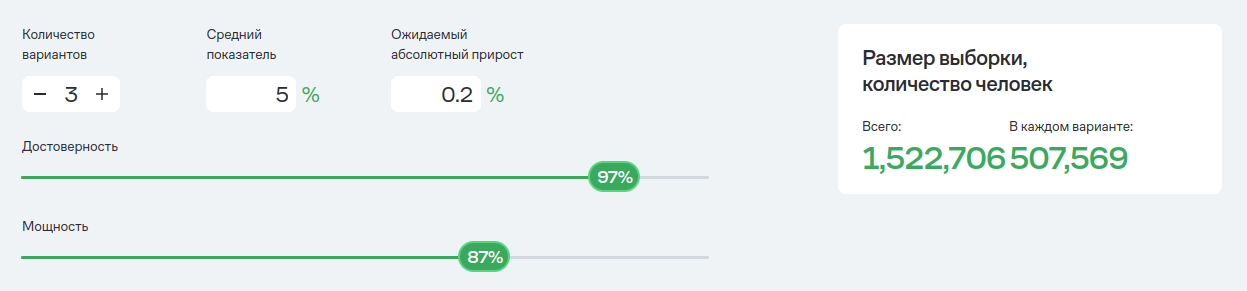

Как видим, при предоставленных параметрах теста потребуется 1 522 706 пользователей (по 507 569 пользователей в каждой группе). Найдем количество дней необходимое для подобного тестирования:

In [6]:
count_month = 40000 # количество пользователей в месяц
count_test = 1522706 # необходимое количество пользователей для проведения теста
time = count_test / count_month 
time


38.06765

#### 38 месяцев понадобится для проведения трёх-вариантного тестирования с заданными параметрами и трафиком в 40 000 пользователей в месяц. Это очень много для проведения тестирования. Ожидаемый прирост конверсии в 0.2% при текущем трафике слишком мал для подтверждения гипотезы с вероятностью 97%. 

#### Рекомендации: оптимальный срок проведения любого тестирования 10-15 дней. При трафике 40 000 пользователей и текущей конверсии 5%, необходимо тестировать ТАКИЕ варианты гипотез, где ожидаемый рост конверсии будет не менее 2% (при трёхвариантном тестировании)
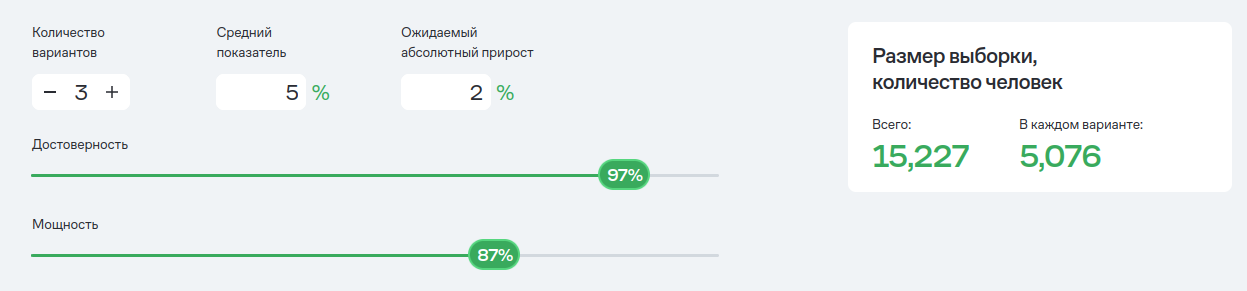
#### В этом случае количество дней на проведение теста составит 11.
#### И конечно же, лучше отказаться от трёхвариантных тестирований, тогда ожидаемый рост конверсии будет не менее 1% и вы сможете провести тестирование за 15 дней:


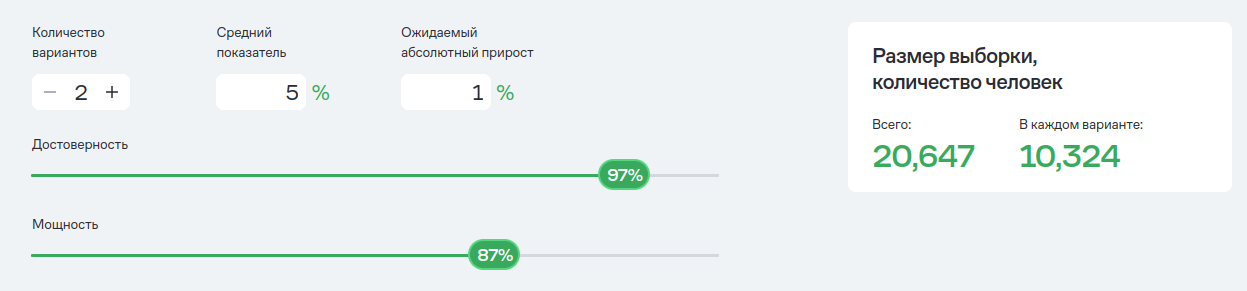

#### Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии:
1) 25 000
2) 30 000
3) 32 000

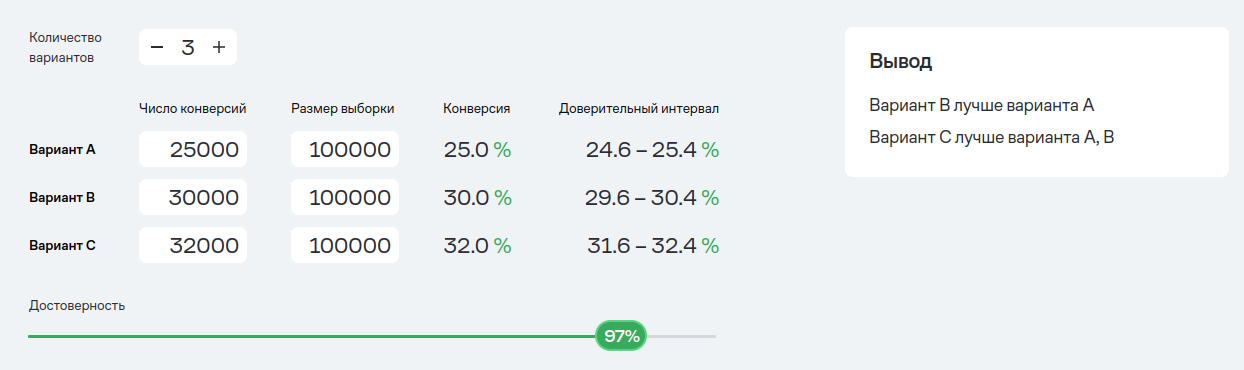

### Задание 3. Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в каждой группе. Для проверки нормальности распределения на выборке в 2350 наблюдений применили , критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%. 
#### Какой бы вывод мы могли сделать в данном случае? 
Критерий Шапиро-Уилка применяется для подтверждения гипотезы о нормальном распределении выборки размером менее 5000 элементов. Если p-value > alfa, то нулевая гипотеза подтверждена - выборка похожа на нормально распределённую. Если p-value < alfa, то верна альтернативная гипотеза - выборка распределена не нормально.
#### В приведенном в задании примере p-value < alfa, следовательно выборка распределена не нормально.

#### В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше всего подойдёт и почему?
CPA (cost per action) — это стоимость одного целевого действия пользователя. 
Следовательно, при ненормально распределённой выборке, лучше всего подойдет непараметрический критерий Манна-Уитни.

### Задание 4. Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 80%? Какую версию мы выкатим на продакшн?
1) А: Средняя - 360, отклонение - 40, количество - 9802
2) В: Средняя - 352, отклонение - 58, количество - 9789

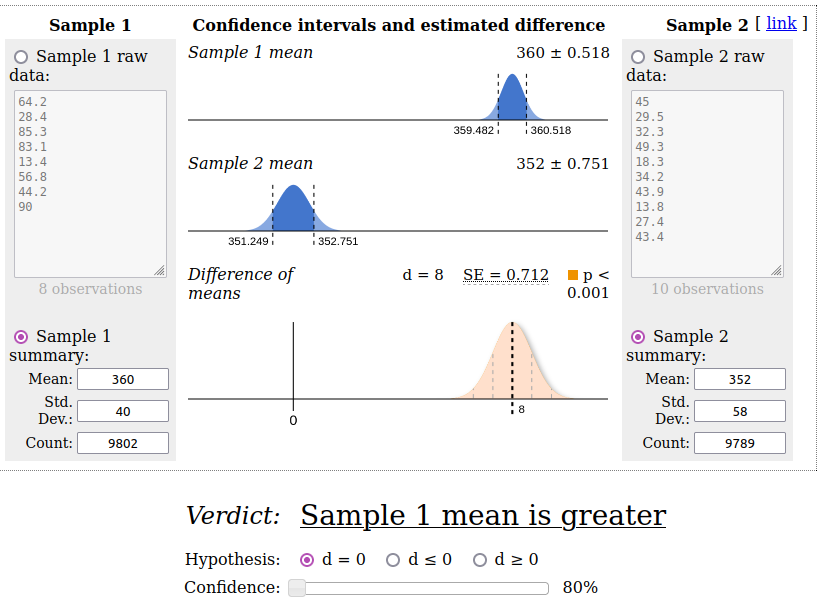
#### Как видим из приведенных выше графиков, при заданных параметрах двух выборок с 80% вероятностью average timespent per user версии А статистически значимо выше, чем в версии В. Поэтому на продакшн необходимо  выкатить версию А.

### Задание 5. Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра с учетом кросс-девайс аналитики по следующей гипотезе:
### Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны пользователя. На схеме необходимо отобразить:
1) Управленческий процесс по договоренностям с внешними партнерами
2) Архитектуру данных с указанием систем, из которых будем скачивать данные
3) Внутрикомандное взаимодействие

#### Решение:
1. Управленческий процесс по договоренностям с внешними партнерами:
   * Команда по управлению партнерствами/отношениями с клиентами взаимодействует с банком для переговоров о сделке на 99% кэшбека на подписку первого месяца.
    * Как только соглашение достигнуто, команда по управлению партнерствами сообщает об этом команде по работе с данными/аналитике и команде разработки.
    * Команда разработки настраивает платформу так, чтобы применять кэшбек для соответствующих пользователей.
2. Архитектура данных с указанием систем, из которых будем скачивать данные:
    * Аналитическая платформа (например, Google Analytics, Mixpanel, Amplitude и т.д.): Данные о веб-трафике и взаимодействии пользователей с онлайн-кинотеатром собираются и хранятся здесь. Это включает в себя данные о просмотрах страниц, кликах, событиях, конверсиях и т.д.
    * Система управления подписками (например, Recurly, Chargebee и т.д.): Данные о подписках и платежах пользователей собираются и хранятся здесь.
    * Система A/B тестирования (например, Optimizely, Google Optimize и т.д.): Данные о распределении пользователей по тестовым группам и их взаимодействии с разными версиями продукта собираются и хранятся здесь.
    * Система управления данными (например, SQL-база данных, Google BigQuery и т.д.): Данные из всех этих источников собираются и интегрируются в этой системе для последующего анализа.
3. Внутрикомандное взаимодействие:
    * Команда по управлению партнерствами: Общается с банком, переговаривается о деталях соглашения и информирует остальную команду о ходе переговоров и результатах.
    * Команда разработки: Настраивает платформу для A/B тестирования и реализации соглашения о кэшбеке. Общается с командой аналитики для установки трекинга и сбора необходимых данных.
    * Команда по работе с данными/аналитика: Анализирует данные перед тестом для определения базовой конверсии, помогает в настройке трекинга, проводит анализ результатов после теста и сообщает о результатах команде управления продуктом и команде по управлению партнерствами.
    * Команда управления продуктом: Принимает решение о реализации изменений на основе результатов теста.
